In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib.pyplot import cm

In [2]:
materials = ['LNO', 'PNO', 'SNO', 'CNO']

df1 = pd.DataFrame({'material': ['LNO', 'LNO', 'LNO', 'LNO'],
                   '1000/T': [1.310, 1.293, 1.276, 1.260],
                   'lnCO2': [-4.011, -3.752, -3.541, -3.394],
                   'lnCH4': [-4.632, -4.33, -4.071, -3.892]
                  })


df2 = pd.DataFrame({'material': ['PNO', 'PNO', 'PNO', 'PNO', 'PNO', 'PNO', 'PNO', 'PNO'],
                   '1000/T': [1.245, 1.229, 1.214, 1.200, 1.186, 1.172, 1.158, 1.145],
                   'lnCO2': [-4.212, -4.062, -3.973, -3.881, -3.781, -3.681, -3.605, -3.520],
                   'lnCH4': [-4.924, -4.780, -4.684, -4.600, -4.504, -4.399, -4.316, -4.222]
                  }) 

df3 = pd.DataFrame({'material': ['SNO', 'SNO', 'SNO', 'SNO', 'SNO'],
                   '1000/T': [1.260, 1.245, 1.229, 1.214, 1.200],
                   'lnCO2': [-3.700, -3.583, -3.466, -3.341, -3.239],
                   'lnCH4': [-4.332, -4.187, -4.058, -3.916, -3.796]
                  })

df4 = pd.DataFrame({'material': ['CNO', 'CNO', 'CNO', 'CNO', 'CNO'],
                   '1000/T': [1.214, 1.200, 1.186, 1.172, 1.158],
                   'lnCO2': [-4.589, -4.409, -4.265, -4.097, -3.997],
                   'lnCH4': [-5.468, -5.299, -5.102, -4.969, -4.825]
                  })

df = pd.concat([df1, df2, df3, df4], axis = 0, ignore_index=True)
df.head(8)

,material,1000/T,lnCO2,lnCH4
0,LNO,1.310,-4.011,-4.632
1,LNO,1.293,-3.752,-4.330
2,LNO,1.276,-3.541,-4.071
3,LNO,1.260,-3.394,-3.892
4,PNO,1.245,-4.212,-4.924
5,PNO,1.229,-4.062,-4.780
6,PNO,1.214,-3.973,-4.684
7,PNO,1.200,-3.881,-4.600


In [3]:
# access individual dframes
dfs = {}

for region, df_region in df.groupby('material'):
    dfs[region] = df_region
    
dfs

{'CNO':    material  1000/T  lnCO2  lnCH4
 17      CNO   1.214 -4.589 -5.468
 18      CNO   1.200 -4.409 -5.299
 19      CNO   1.186 -4.265 -5.102
 20      CNO   1.172 -4.097 -4.969
 21      CNO   1.158 -3.997 -4.825,
 'LNO':   material  1000/T  lnCO2  lnCH4
 0      LNO   1.310 -4.011 -4.632
 1      LNO   1.293 -3.752 -4.330
 2      LNO   1.276 -3.541 -4.071
 3      LNO   1.260 -3.394 -3.892,
 'PNO':    material  1000/T  lnCO2  lnCH4
 4       PNO   1.245 -4.212 -4.924
 5       PNO   1.229 -4.062 -4.780
 6       PNO   1.214 -3.973 -4.684
 7       PNO   1.200 -3.881 -4.600
 8       PNO   1.186 -3.781 -4.504
 9       PNO   1.172 -3.681 -4.399
 10      PNO   1.158 -3.605 -4.316
 11      PNO   1.145 -3.520 -4.222,
 'SNO':    material  1000/T  lnCO2  lnCH4
 12      SNO   1.260 -3.700 -4.332
 13      SNO   1.245 -3.583 -4.187
 14      SNO   1.229 -3.466 -4.058
 15      SNO   1.214 -3.341 -3.916
 16      SNO   1.200 -3.239 -3.796}

In [4]:
def linear(x):
    return slope*x + intercept

***Activation Energy for CO2***

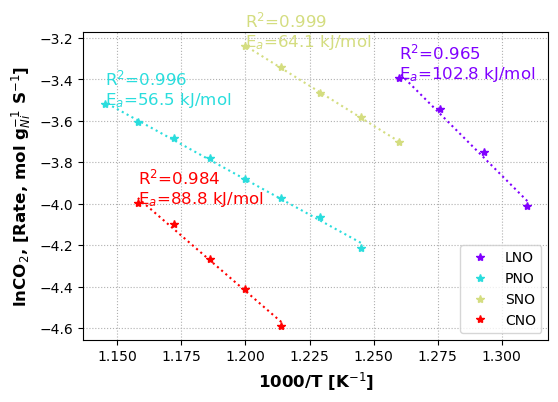

In [5]:
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

colors = cm.rainbow(np.linspace(0, 1, len(materials)))

for j, mat in enumerate(materials):
    
    y = dfs[mat]['lnCO2']
    
    slope, intercept, r, p, std_err = stats.linregress(dfs[mat]['1000/T'], y)
        
    model = list(map(linear, dfs[mat]['1000/T']))
    
    # calculate r_sq
    r_sq = r**2
    
    # calculate r_sq
    r_sq = r**2

    # calcular r_adj
    n = len(y)
    r_adj = 1 - (((1-abs(r_sq))*(n-1))/(n-3))
    
    Ea = -slope*8.314
    
    ax.plot(dfs[mat]['1000/T'], y, '*', color = colors[j], label = mat)
    ax.plot(dfs[mat]['1000/T'], model, linestyle = ':', color = colors[j])
    ax.text(dfs[mat]['1000/T'].iloc[-1], y.iloc[-1],\
            'R$^2$={0:.3f}\nE$_a$={1:.1f} kJ/mol'.format(r_adj, Ea), fontsize=12, color=colors[j])
    ax.legend()
    
ax.legend(facecolor='white', loc = 'lower right')
ax.set_xlabel("1000/T [K$^{-1}$]", fontsize=12, fontweight='bold')
ax.set_ylabel("lnCO$_2$, [Rate, mol g$_{Ni}^{-1}$ S$^{-1}$]", fontsize=12, fontweight='bold')
ax.grid(linestyle = ':')

***Activation Energy for CH4***

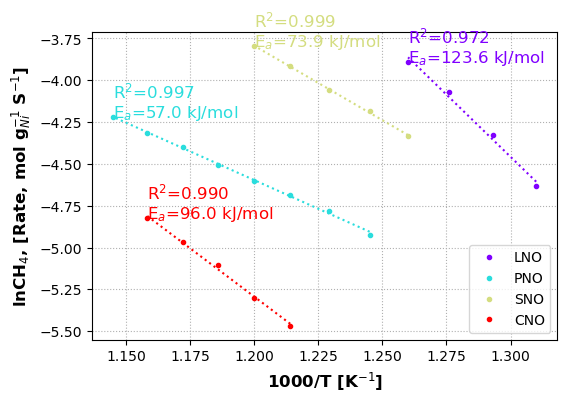

In [6]:
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

colors = cm.rainbow(np.linspace(0, 1, len(materials)))

for j, mat in enumerate(materials):
    
    y = dfs[mat]['lnCH4']
    
    slope, intercept, r, p, std_err = stats.linregress(dfs[mat]['1000/T'], y)
        
    model = list(map(linear, dfs[mat]['1000/T']))
    
    # calculate r_sq
    r_sq = r**2
    
    # calculate r_sq
    r_sq = r**2

    # calcular r_adj
    n = len(y)
    r_adj = 1 - (((1-abs(r_sq))*(n-1))/(n-3))
    
    Ea = -slope*8.314
    
    ax.plot(dfs[mat]['1000/T'], y, '.', color = colors[j], label = mat)
    ax.plot(dfs[mat]['1000/T'], model, linestyle = ':', color = colors[j])
    ax.text(dfs[mat]['1000/T'].iloc[-1], y.iloc[-1],\
            'R$^2$={0:.3f}\nE$_a$={1:.1f} kJ/mol'.format(r_adj, Ea), fontsize=12, color=colors[j])
    ax.legend()
    ax.legend()
    
ax.legend(facecolor='white', loc = 'lower right')
ax.set_xlabel("1000/T [K$^{-1}$]", fontsize=12, fontweight='bold')
ax.set_ylabel("lnCH$_4$, [Rate, mol g$_{Ni}^{-1}$ S$^{-1}$]", fontsize=12, fontweight='bold')
ax.grid(linestyle = ':')